# FairnessDPLab: A Comprehensive Benchmark for Evaluating Fairness in Artifical Intelligence (AI)
FairnessDPLab is a benchmarking tool designed to measure and evaluate fairness under different settings for artificial intelligence pipelines. One can experiment with different ai models on various datasets with or without differential privacy. This tool provides a structured environment to explore different fairness metrics, identify potential biases, and assess their impact on model outcomes when differential privacy is introduced.

With FairnessDPLab, you can:
- Experiment with various algorithms, including Naive Bayes, Logistic Regression, Random Forest, Decision Tree, Deep Learning or implement custom models.
- Utilize multiple datasets to evaluate fairness under different conditions.
- Implement fairness metrics to analyze the performance and equity of AI models.
- Introduce differential privacy and see its the effect on model outcomes.
- Save and track experimental results, enabling a deeper understanding of how different variables influence fairness in AI.

###Setup
Install required python packages and import the used library, functions.


In [ ]:
!python --version

Python 3.11.11


In [ ]:
# diffprivlib is used for differentially private machine learning.
!pip install diffprivlib==0.6.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
# aif360 is used for fairness analysis.
!pip install aif360==0.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
# diffprivlib is used for differentially private deep learning.
# !pip install opacus==1.5.2

In [ ]:
# Required Libraries
import os
import shutil
import socket
import warnings
import zipfile
from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
from IPython.display import Markdown, display
# from opacus import PrivacyEngine
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from torch.utils.data import DataLoader, TensorDataset

from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import (
    load_preproc_data_adult, load_preproc_data_german, load_preproc_data_compas)
from aif360.datasets import (
    AdultDataset, BankDataset, BinaryLabelDataset, CompasDataset, GermanDataset)
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

import diffprivlib.models as dp

# Set default timeout and seed
socket.setdefaulttimeout(15)
np.random.seed(42)

# Ignore warnings
warnings.filterwarnings('ignore')


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [ ]:
# Additional Libs
# Add any additional libs here if needed.

### Helper Functions

#### Custom Dataset creation helper functions
If you want to implement custom dataset besides using already defined ones.

##### Creating a custom dataset class

In [ ]:
import os
import pandas as pd
from aif360.datasets import StandardDataset

class CustomDataset(StandardDataset):
    """A customizable dataset class compatible with AIF360's StandardDataset format.

    This class can be used to create datasets that follow the AIF360 structure
    with user-specified data, labels, protected attributes, and other options.
    """

    def __init__(self,
                 filepath=None,
                 df=None,
                 label_name='label',
                 favorable_classes=[1],
                 protected_attribute_names=['protected_attribute'],
                 privileged_classes=[['privileged']],
                 instance_weights_name=None,
                 categorical_features=None,
                 features_to_keep=None,
                 features_to_drop=None,
                 na_values=None,
                 custom_preprocessing=None,
                 metadata=None,
                 column_names=None,
                 sep=','):
        """
        Initialize the CustomDataset.

        Args:
            filepath (str, optional): Path to the data file. If not provided, `df` must be provided.
            df (pd.DataFrame, optional): DataFrame containing the data. If not provided, `filepath` must be provided.
            label_name (str): The name of the label column.
            favorable_classes (list): List of favorable class values.
            protected_attribute_names (list): List of protected attribute names.
            privileged_classes (list): List of privileged class values for each protected attribute.
            instance_weights_name (str, optional): Name of the instance weights column, if applicable.
            categorical_features (list, optional): List of categorical feature names.
            features_to_keep (list, optional): List of features to keep.
            features_to_drop (list, optional): List of features to drop.
            na_values (list, optional): List of values to recognize as NA/NaN.
            custom_preprocessing (function, optional): Custom preprocessing function to apply to the DataFrame.
            metadata (dict, optional): Metadata including mappings for labels and protected attributes.
            column_names (list, optional): List of column names if `filepath` is used and the file does not include a header.
            sep (str, optional): Separator used in the file if `filepath` is used.
        """

        if df is None and filepath is None:
            raise ValueError("Either `df` or `filepath` must be provided.")

        if df is None:
            # Load the dataset from a file
            df = pd.read_csv(filepath, sep=sep, header=None if column_names else 'infer', names=column_names, na_values=na_values)

        if features_to_drop:
            df = df.drop(columns=features_to_drop)

        if features_to_keep:
            df = df[features_to_keep]

        if custom_preprocessing:
            df = custom_preprocessing(df)

        super(CustomDataset, self).__init__(df=df, label_name=label_name,
                                            favorable_classes=favorable_classes,
                                            protected_attribute_names=protected_attribute_names,
                                            privileged_classes=privileged_classes,
                                            instance_weights_name=instance_weights_name,
                                            categorical_features=categorical_features,
                                            features_to_keep=features_to_keep,
                                            features_to_drop=features_to_drop,
                                            na_values=na_values,
                                            custom_preprocessing=custom_preprocessing,
                                            metadata=metadata)


##### Load and preprocess the custom dataset

In [ ]:
def load_preproc_data_custom(protected_attributes=None):
  ### DO PREPROCESSING
  ####

  return CustomDataset


#### Default helper functions

In [ ]:
def initialize_classification_metrics_df():
    return pd.DataFrame({
                        'entry_name': pd.Series(dtype='str'),
                        'algorithm': pd.Series(dtype='str'),
                        'epsilon': pd.Series(dtype='float'),
                        'random_state': pd.Series(dtype='float'),
                        'accuracy': pd.Series(dtype='float'),
                        'balanced_accuracy': pd.Series(dtype='float'),
                        'stat_parity_diff': pd.Series(dtype='float'),
                        'disparate_impact': pd.Series(dtype='float'),
                        'consistency': pd.Series(dtype='float'),
                        'avg_odds_diff': pd.Series(dtype='float'),
                        'equal_opp_diff': pd.Series(dtype='float'),
                        'theil_index': pd.Series(dtype='float'),
                        'false_disc_rate_diff': pd.Series(dtype='float'),
                        'false_neg_rate_diff': pd.Series(dtype='float'),
                        'false_pos_rate_diff': pd.Series(dtype='float'),
                    })


In [ ]:
def download_aif360_datasets(dataset_name, path="/usr/local/lib/python3.11/dist-packages/aif360/data/raw/"):
    datasets = {
        'german': {
            'german.data': 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
            'german.doc': 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc'
        },
        'adult': {
            'adult.data': 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
            'adult.test': 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
            'adult.names': 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'
        },
        'bank': {
            'bank-additional.zip': 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
        },
        'compas': {
            'compas-scores-two-years.csv': 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
        },
    }

    # Print available datasets
    print(f"Available datasets for aif360 are : \n {list(datasets.keys())}")

    if dataset_name not in datasets:
        raise ValueError(f"Dataset '{dataset_name}' not found. Available datasets are: {list(datasets.keys())}")

    dataset_path = os.path.join(path, dataset_name)
    if not os.path.exists(dataset_path):
        print(f"Trying to download {dataset_name} dataset...")
        os.makedirs(dataset_path)
        print("Created Directory : ", dataset_path)
    else:
        print(f"Dataset {dataset_name} already exists at {dataset_path}")
        return

    for item in datasets[dataset_name]:
        try:
            file_path = os.path.join(dataset_path, item)
            urlretrieve(datasets[dataset_name][item], file_path)
            print(f"{item} is downloaded under {dataset_path}")

            # Unzip the file if it's a zip file
            if item.endswith('.zip'):
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    temp_dir = os.path.join(dataset_path, 'temp_extracted')
                    os.makedirs(temp_dir, exist_ok=True)
                    zip_ref.extractall(temp_dir)

                    # Move extracted files to the dataset_path
                    for root, dirs, files in os.walk(temp_dir):
                        for file in files:
                            extracted_file_path = os.path.join(root, file)
                            os.rename(extracted_file_path, os.path.join(dataset_path, file))

                    # Remove the temporary directory
                    shutil.rmtree(temp_dir)
                print(f"{item} is unzipped under {dataset_path}")

                # Remove the zip file after extraction
                os.remove(file_path)

        except Exception as e:
            print(f"Exception occurred! -> {e}")

In [ ]:
def load_dataset(
        dataset_used,  # "adult", "german", "compas"
        protected_attribute_used=None  # 1 - sex, other - race or age
):
    """Loads and preprocesses a dataset based on the specified name and protected attribute.

    Args:
        dataset_used (str): The name of the dataset to load ("adult", "german", "compas").
        protected_attribute_used (int, optional): The protected attribute to use (1 for sex, other for race or age).
                                                 Defaults to None.

    Returns:
        tuple: A tuple containing the loaded dataset, privileged groups, and unprivileged groups.
    """
    if dataset_used == "adult":
        if protected_attribute_used == 1:
            privileged_groups = [{'sex': 1}]
            unprivileged_groups = [{'sex': 0}]
            dataset_orig = load_preproc_data_adult(['sex'])
        else:
            privileged_groups = [{'race': 1}]
            unprivileged_groups = [{'race': 0}]
            dataset_orig = load_preproc_data_adult(['race'])

    elif dataset_used == "german":
        if protected_attribute_used == 1:
            privileged_groups = [{'sex': 1}]
            unprivileged_groups = [{'sex': 0}]
            dataset_orig = load_preproc_data_german(['sex'])
        else:
            privileged_groups = [{'age': 1}]
            unprivileged_groups = [{'age': 0}]
            dataset_orig = load_preproc_data_german(['age'])

    elif dataset_used == "compas":
        if protected_attribute_used == 1:
            privileged_groups = [{'sex': 1}]
            unprivileged_groups = [{'sex': 0}]
            dataset_orig = load_preproc_data_compas(['sex'])
        else:
            privileged_groups = [{'race': 1}]
            unprivileged_groups = [{'race': 0}]
            dataset_orig = load_preproc_data_compas(['race'])

    elif dataset_used == "custom":
        privileged_groups = [{'group_name': 1}]
        unprivileged_groups = [{'group_name': 0}]
        dataset_orig = load_preproc_data_custom(['group_name'])


    return dataset_orig, privileged_groups, unprivileged_groups

In [ ]:
def display_dataset_info(dataset_orig):
    display(Markdown("#### Training Dataset shape"))
    print(dataset_orig.features.shape)
    display(Markdown("#### Favorable and unfavorable labels"))
    print(dataset_orig.favorable_label, dataset_orig.unfavorable_label)
    display(Markdown("#### Protected attribute names"))
    print(dataset_orig.protected_attribute_names)
    display(Markdown("#### Privileged and unprivileged protected attribute values"))
    print(dataset_orig.privileged_protected_attributes,
    dataset_orig.unprivileged_protected_attributes)
    display(Markdown("#### Dataset feature names"))
    print(dataset_orig.feature_names)


---

In [ ]:
def create_dataset_pred(dataset_orig, y_pred):
    # Prepare predicted dataset
    print('creating predictions dataset...')
    dataset_pred = dataset_orig.copy(deepcopy=True)
    dataset_pred.labels = y_pred
    return dataset_pred

In [ ]:
def show_metric_results(dataset_test,
                        dataset_test_pred_nonprivate,
                        unprivileged_groups,
                        privileged_groups):

  classified_metric_pred = ClassificationMetric(dataset_test,
                                                dataset_test_pred_nonprivate,
                                                unprivileged_groups,
                                                privileged_groups)
  print("Test set: Classification accuracy = {:.3f}".format(classified_metric_pred.accuracy()))
  TPR = classified_metric_pred.true_positive_rate()
  TNR = classified_metric_pred.true_negative_rate()
  bal_acc_debiasing_test = 0.5*(TPR+TNR)
  print("Test set: Balanced classification accuracy = {:.3f}".format(bal_acc_debiasing_test))
  print("Test set: Disparate impact = {:.3f}".format(classified_metric_pred.disparate_impact()))
  fdr = classified_metric_pred.false_discovery_rate_ratio()
  fdr = min(fdr, 1/fdr)
  print("Test set: False discovery rate ratio = {:.3f}".format(fdr))

  return classified_metric_pred

In [ ]:
def create_metric_entry(entry_name, algorithm, epsilon, random_state, classified_metric_pred):
    metrics = [
      entry_name,
      algorithm,
      epsilon, #float('inf') -> meaning no privacy
      random_state,
      classified_metric_pred.accuracy(),
      (0.5 * (classified_metric_pred.true_positive_rate() + classified_metric_pred.true_negative_rate())),
      classified_metric_pred.statistical_parity_difference(),
      classified_metric_pred.disparate_impact(),
      classified_metric_pred.consistency()[0],
      classified_metric_pred.average_odds_difference(),
      classified_metric_pred.equal_opportunity_difference(),
      classified_metric_pred.theil_index(),
      classified_metric_pred.false_discovery_rate_difference(),
      classified_metric_pred.false_negative_rate_difference(),
      classified_metric_pred.false_positive_rate_difference()
    ]

    return metrics



### Data

**FairnessDPLab** comes preloaded with three default datasets that are commonly used in fairness research: **Compas**, **Adult**, and **German**. These datasets are ready to be used for experiments and analysis, allowing you to quickly evaluate fairness metrics across different algorithms without the need for extensive data preparation.

#### Default Datasets:
1. **Compas**: A dataset used for predicting recidivism, often scrutinized for potential racial bias.
2. **Adult**: A dataset that predicts whether an individual's income exceeds $50K/year, widely used to study fairness in income prediction models.
3. **German**: A dataset used for credit scoring, where fairness concerns often arise regarding demographic factors.

Each of these datasets is already formatted and integrated into the benchmarking process, so you can directly start running experiments on them.

#### Custom Datasets:
In addition to these default datasets, **FairnessDPLab** is flexible enough to allow the use of custom datasets. If you wish to experiment with your own data, you can easily load and integrate it into the framework. Custom datasets must follow the expected format, and you can then apply the same fairness evaluation process, including model training, fairness metric calculation, and result analysis.

This flexibility ensures that **FairnessDPLab** can accommodate a wide range of use cases, from standard benchmarks to custom real-world applications.


#### Preparation for default data

In [ ]:
def prepare_adult_data(test_size=0.8,
                       adult_protected_attribute_used = 1, # 1 - sex
                       features_to_keep=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']):
  """
  Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
  """
  download_aif360_datasets("adult")

  adult_dataset, adult_privileged_groups, adult_unprivileged_groups = load_dataset(dataset_used="adult",
                                                                                   protected_attribute_used=adult_protected_attribute_used)

  adult_dataset_train, adult_dataset_test = adult_dataset.split([test_size], shuffle=True)

  return adult_dataset_train, adult_dataset_test, adult_privileged_groups, adult_unprivileged_groups

In [ ]:
def prepare_adult_data_for_dl(test_size=0.2,
                              adult_protected_attribute_used = 1, # 1 - sex
                              features_to_keep=['age', 'sex', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']):
  """
  Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
  """
  # Load the adult dataset
  adult_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data" # data without column labels
  adult_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
          "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
          "hours-per-week", "native-country", "income"] # column labels are given explicitly
  df = pd.read_csv(adult_url, names=adult_names, na_values="?")
  df = df.dropna()

  # Define your features, target and sensitive_attribute
  target_column = 'income'
  features = df[features_to_keep]
  target = df[target_column]
  sensitive_attribute = 'sex_ Female'  # Adjust based on your one-hot encoding

  # Data transformation pipelines
  numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
  # only sex will be used from categorical features
  # categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
  categorical_features = ["sex"]

  numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
  categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features)
      ])

  features = preprocessor.fit_transform(features)

  # Split the dataset
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=test_size, random_state=42)

  # Map your string categories to integers
  income_mapping = {' <=50K': 0, ' >50K': 1}
  target_train_encoded = target_train.map(income_mapping)
  target_test_encoded = target_test.map(income_mapping)

  # Convert to PyTorch tensors
  features_train = torch.tensor(features_train, dtype=torch.float)
  target_train = torch.tensor(target_train_encoded.values, dtype=torch.long)
  features_test = torch.tensor(features_test, dtype=torch.float)
  target_test = torch.tensor(target_test_encoded.values, dtype=torch.long)

  # DataLoader
  train_data = TensorDataset(features_train, target_train)
  test_data = TensorDataset(features_test, target_test)
  train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
  test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

  # Getting feature names from one-hot encoded categorical features
  ohe_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

  # Combine with numeric feature names
  new_feature_columns = numeric_features + list(ohe_columns)

  # Convert tensors to Pandas DataFrame
  features_train_df = pd.DataFrame(features_train.numpy(), columns=new_feature_columns)
  target_train_series = pd.Series(target_train.numpy(), name=target_column)
  features_test_df = pd.DataFrame(features_test.numpy(), columns=new_feature_columns)
  target_test_series = pd.Series(target_test.numpy(), name=target_column)

  # Concatenate the DataFrames and Series
  train_df = pd.concat([features_train_df, target_train_series], axis=1)
  test_df = pd.concat([features_test_df, target_test_series], axis=1)

  return train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_column, sensitive_attribute


In [ ]:
def prepare_german_data(test_size=0.8,
                       german_protected_attribute_used = 1, # 1 - sex
                       features_to_keep=['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']):
  """
  Abstract: TODO
  """
  download_aif360_datasets("german")

  german_dataset, german_privileged_groups, german_unprivileged_groups = load_dataset(dataset_used="german",
                                                                                      protected_attribute_used=german_protected_attribute_used)

  german_dataset_train, german_dataset_test = german_dataset.split([test_size], shuffle=True)

  return german_dataset_train, german_dataset_test, german_privileged_groups, german_unprivileged_groups

In [ ]:
def prepare_german_data_for_dl(test_size=0.2,
                               german_protected_attribute_used=1,  # 1 - sex
                               features_to_keep=['Age', 'CreditAmount', 'CreditHistory', 'Purpose', 'SavingsAccount', 'Sex']):
    """
    Abstract: Prepare and preprocess the German Credit dataset for deep learning experiments.
    """
    # Load the German Credit dataset
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
    column_names = ['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingsAccount',
                    'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex', 'OtherDebtors', 'PresentResidenceSince',
                    'Property', 'Age', 'OtherInstallmentPlans', 'Housing', 'ExistingCredits', 'Job',
                    'Dependents', 'Telephone', 'ForeignWorker', 'CreditRisk']
    df = pd.read_csv(url, header=None, names=column_names, sep=' ')
    print("Initial dataset shape:", df.shape)

    # Define a mapping for the 'PersonalStatusSex' column to extract gender
    gender_map = {
        'A91': 1,  # male
        'A92': 0,  # female
        'A93': 1,  # male
        'A94': 1,  # male
        'A95': 0   # female
    }

    # Apply the mapping to the dataframe
    df['Sex'] = df['PersonalStatusSex'].map(gender_map)

    # Define your features and target
    target_column = 'CreditRisk'
    features = df[features_to_keep]
    target = df[target_column]

    # Data transformation pipelines
    numeric_features = ['Age', 'CreditAmount']
    categorical_features = ['CreditHistory', 'Purpose', 'SavingsAccount', 'Sex']

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Transform features
    features = preprocessor.fit_transform(features)

    # Check if features have valid dimensions
    print("Shape after transformation:", features.shape)
    if features.shape[0] == 0:
        raise ValueError("The transformed dataset is empty. Please check the preprocessing steps.")

    # Split the dataset
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=test_size, random_state=42)

    # Map your string categories to integers
    credit_class_mapping = {2: 0, 1: 1}  # 1 good, 2 bad
    target_train = target_train.map(credit_class_mapping)
    target_test = target_test.map(credit_class_mapping)

    # Convert to PyTorch tensors
    features_train = torch.tensor(features_train.toarray(), dtype=torch.float)
    target_train = torch.tensor(target_train.values, dtype=torch.long)
    features_test = torch.tensor(features_test.toarray(), dtype=torch.float)
    target_test = torch.tensor(target_test.values, dtype=torch.long)

    # DataLoader
    train_data = TensorDataset(features_train, target_train)
    test_data = TensorDataset(features_test, target_test)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

    # Getting feature names from one-hot encoded categorical features
    ohe_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

    # Combine with numeric feature names
    new_feature_columns = numeric_features + list(ohe_columns)

    # Convert tensors to Pandas DataFrame
    features_train_df = pd.DataFrame(features_train.numpy(), columns=new_feature_columns)
    target_train_series = pd.Series(target_train.numpy(), name=target_column)
    features_test_df = pd.DataFrame(features_test.numpy(), columns=new_feature_columns)
    target_test_series = pd.Series(target_test.numpy(), name=target_column)

    # Concatenate the DataFrames and Series
    train_df = pd.concat([features_train_df, target_train_series], axis=1)
    test_df = pd.concat([features_test_df, target_test_series], axis=1)

    print("Final train DataFrame shape:", train_df.shape)
    print("Final test DataFrame shape:", test_df.shape)

    return train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_column, 'Sex_1'


In [ ]:
def prepare_compas_data(test_size=0.8,
                       compas_protected_attribute_used = 1, # 1 - sex
                       features_to_keep=['sex', 'race', 'age_cat=25 to 45', 'age_cat=Greater than 45', 'age_cat=Less than 25', 'priors_count=0', 'priors_count=1 to 3', 'priors_count=More than 3', 'c_charge_degree=F', 'c_charge_degree=M']):
  """
  Abstract: TODO
  """
  download_aif360_datasets("compas")

  compas_dataset, compas_privileged_groups, compas_unprivileged_groups = load_dataset(dataset_used="compas",
                                                                                      protected_attribute_used=compas_protected_attribute_used)

  compas_dataset_train, compas_dataset_test = compas_dataset.split([test_size], shuffle=True)

  return compas_dataset_train, compas_dataset_test, compas_privileged_groups, compas_unprivileged_groups

In [ ]:
def prepare_compas_data_for_dl(test_size=0.2,
                               compas_protected_attribute_used=1,  # 1 - sex
                               features_to_keep=['sex', 'race', 'age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'c_charge_degree']):
    """
    Abstract: Predict recidivism based on COMPAS dataset.
    """
    # Load the COMPAS dataset
    url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
    df = pd.read_csv(url)
    print("Initial dataset shape:", df.shape)

    # Drop rows with missing values in the features of interest
    df = df.dropna(subset=features_to_keep)
    print("After dropping missing values, dataset shape:", df.shape)

    # Check if the dataset is not empty
    if df.empty:
        raise ValueError("The dataset is empty after filtering. Please check the data loading and preprocessing steps.")

    # Define your features, target, and sensitive_attribute
    target_column = 'two_year_recid'
    features = df[features_to_keep]
    target = df[target_column]
    sensitive_attribute = 'sex_Female'  # Adjust based on your one-hot encoding

    # Data transformation pipelines
    numeric_features = ['age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']
    categorical_features = ['c_charge_degree', 'race', 'sex']

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Transform features
    features = preprocessor.fit_transform(features)

    # Check if features have valid dimensions
    print("Shape after transformation:", features.shape)
    if features.shape[0] == 0:
        raise ValueError("The transformed dataset is empty. Please check the preprocessing steps.")

    # Split the dataset
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=test_size, random_state=42)

    # Convert to PyTorch tensors
    features_train = torch.tensor(features_train, dtype=torch.float)
    target_train = torch.tensor(target_train.values, dtype=torch.long)
    features_test = torch.tensor(features_test, dtype=torch.float)
    target_test = torch.tensor(target_test.values, dtype=torch.long)

    # DataLoader
    train_data = TensorDataset(features_train, target_train)
    test_data = TensorDataset(features_test, target_test)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

    # Getting feature names from one-hot encoded categorical features
    ohe_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

    # Combine with numeric feature names
    new_feature_columns = numeric_features + list(ohe_columns)

    # Convert tensors to Pandas DataFrame
    features_train_df = pd.DataFrame(features_train.numpy(), columns=new_feature_columns)
    target_train_series = pd.Series(target_train.numpy(), name=target_column)
    features_test_df = pd.DataFrame(features_test.numpy(), columns=new_feature_columns)
    target_test_series = pd.Series(target_test.numpy(), name=target_column)

    # Concatenate the DataFrames and Series
    train_df = pd.concat([features_train_df, target_train_series], axis=1)
    test_df = pd.concat([features_test_df, target_test_series], axis=1)

    print("Final train DataFrame shape:", train_df.shape)
    print("Final test DataFrame shape:", test_df.shape)

    return train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_column, sensitive_attribute


#### Prepare your custom data

In [ ]:
def prepare_custom_data(test_size=0.8,
                        custom_protected_attribute_used=1,  # 1 - sex
                        features_to_keep=[]):
    """
    Prepare a custom dataset for fairness analysis.
    """
    # Assuming load_dataset is a function that loads the dataset based on the given parameters
    custom_dataset, custom_privileged_groups, custom_unprivileged_groups = load_dataset(
        dataset_used="custom",
        protected_attribute_used=custom_protected_attribute_used
    )

    # Split the dataset into training and testing sets
    custom_dataset_train, custom_dataset_test = custom_dataset.split([test_size], shuffle=True)

    return custom_dataset_train, custom_dataset_test, custom_privileged_groups, custom_unprivileged_groups


In [ ]:
def prepare_custom_data_for_dl(test_size=0.8,
                                custom_protected_attribute_used=1,  # 1 - sex
                                features_to_keep=[]):
    """
    Prepare a custom dataset for fairness analysis for deep learning.
    """

    return None


#### Initializing datasets

In [ ]:
def initialize_data_config(dataset_name):
  """Initializes the data configuration based on the specified dataset name.

  This function loads the specified dataset, splits it into training and testing sets,
  and defines the privileged and unprivileged groups based on the protected attribute.

  Args:
    dataset_name (str): The name of the dataset to use ("adult", "german", "compas", "custom").

  Returns:
    tuple: A tuple containing the testing dataset, training dataset, unprivileged groups, and privileged groups.

  Raises:
    Exception: If the specified dataset name is not valid.
  """
  if dataset_name == 'german':
      dataset_orig_test, dataset_orig_train, unprivileged_groups, privileged_groups  = prepare_german_data()
  elif dataset_name == 'adult':
      dataset_orig_train, dataset_orig_test, privileged_groups, unprivileged_groups  = prepare_adult_data()
  elif dataset_name == 'compas':
      dataset_orig_train, dataset_orig_test, privileged_groups, unprivileged_groups  = prepare_compas_data()
  elif dataset_name == 'custom':
      dataset_orig_train, dataset_orig_test, privileged_groups, unprivileged_groups  = prepare_custom_data()
  else:
      raise Exception(f"dataset {dataset_name} not in the given dataset set: adult, german, compas, bank")

  print("Data Config: ", dataset_name, " - ", unprivileged_groups, " - ", privileged_groups)
  return dataset_orig_test, dataset_orig_train, unprivileged_groups, privileged_groups


In [ ]:
def initialize_data_config_dl(dataset_name):
  if dataset_name == 'german':
      train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_label, sensitive_attribute = prepare_german_data_for_dl()
  elif dataset_name == 'adult':
      train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_label, sensitive_attribute = prepare_adult_data_for_dl()
  elif dataset_name == 'compas':
      train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_label, sensitive_attribute = prepare_compas_data_for_dl()
  # elif dataset_name == 'custom':
      # dataset_orig_train, dataset_orig_test, privileged_groups, unprivileged_groups  = prepare_custom_data_for_dl()
  else:
      raise Exception(f"dataset {dataset_name} not in the given dataset set: adult, german, compas or custom")

  return train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_label, sensitive_attribute


Below two cells are needed to clear data folders under aif360 library so that data can be successfully downloaded later on.

In [ ]:
!ls /usr/local/lib/python3.11/dist-packages/aif360/data/raw/

adult  bank  compas  german  meps  README.md


In [ ]:
!rm -r /usr/local/lib/python3.11/dist-packages/aif360/data/raw/

---

## Modeling


### Naive Bayes

In [ ]:
def naive_bayes(dataset_orig_train,
                dataset_orig_test,
                unprivileged_groups,
                privileged_groups):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.model_selection import GridSearchCV

  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  nonprivate_clf = GaussianNB()
  nonprivate_clf.fit(X_train, y_train)
  nonprivate_y_pred = nonprivate_clf.predict(X_test)

  print("Non-private test accuracy: %.2f%%" %
        (nonprivate_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_nonprivate = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                          y_pred=nonprivate_y_pred)

  #
  classified_metric_pred = show_metric_results(dataset_orig_test,
                                                dataset_orig_test_pred_nonprivate,
                                                unprivileged_groups,
                                                privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred


In [ ]:
def dp_naive_bayes(dataset_orig_train,
                   dataset_orig_test,
                   unprivileged_groups,
                   privileged_groups,
                   random_state,
                   epsilon=1):

  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  dp_clf = dp.GaussianNB(random_state=random_state, epsilon=epsilon)
  #
  dp_clf.fit(X_train, y_train)
  dp_y_pred = dp_clf.predict(X_test)

  # print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
  #       (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_dp = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                  y_pred=dp_y_pred)
  #
  classified_metric_pred_dp = ClassificationMetric(dataset_orig_test,
                                                  dataset_orig_test_pred_dp,
                                                  unprivileged_groups,
                                                  privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred_dp

### Logistic Regression

In [ ]:
def logistic_regression(dataset_orig_train,
                        dataset_orig_test,
                        unprivileged_groups,
                        privileged_groups):
  from sklearn.linear_model import LogisticRegression

  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  #
  nonprivate_clf = LogisticRegression(solver="liblinear")
  nonprivate_clf.fit(X_train, y_train)
  nonprivate_y_pred = nonprivate_clf.predict(X_test)

  print("Non-private test accuracy: %.2f%%" %
        (nonprivate_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_nonprivate = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                          y_pred=nonprivate_y_pred)

  #
  classified_metric_pred = show_metric_results(dataset_orig_test,
                                                dataset_orig_test_pred_nonprivate,
                                                unprivileged_groups,
                                                privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred


In [ ]:
def dp_logistic_regression(dataset_orig_train,
                            dataset_orig_test,
                            unprivileged_groups,
                            privileged_groups,
                            random_state,
                            epsilon=1):
  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  dp_clf = dp.LogisticRegression(random_state=random_state, epsilon=epsilon)
  #
  dp_clf.fit(X_train, y_train)
  dp_y_pred = dp_clf.predict(X_test)

  # print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
  #       (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_dp = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                  y_pred=dp_y_pred)
  #
  classified_metric_pred_dp = ClassificationMetric(dataset_orig_test,
                                                  dataset_orig_test_pred_dp,
                                                  unprivileged_groups,
                                                  privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred_dp

### Random Forest

In [ ]:
def random_forest(dataset_orig_train,
                  dataset_orig_test,
                  unprivileged_groups,
                  privileged_groups):

  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  #
  nonprivate_clf = dp.RandomForestClassifier(random_state=0, epsilon=float('inf'))
  nonprivate_clf.fit(X_train, y_train)
  nonprivate_y_pred = nonprivate_clf.predict(X_test)

  print("Non-private test accuracy: %.2f%%" %
        (nonprivate_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_nonprivate = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                          y_pred=nonprivate_y_pred)

  #
  classified_metric_pred = show_metric_results(dataset_orig_test,
                                                dataset_orig_test_pred_nonprivate,
                                                unprivileged_groups,
                                                privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred


In [ ]:
def dp_random_forest(dataset_orig_train,
                      dataset_orig_test,
                      unprivileged_groups,
                      privileged_groups,
                      random_state,
                      epsilon=1):

  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  dp_clf = dp.RandomForestClassifier(random_state=random_state, epsilon=epsilon)

  #
  dp_clf.fit(X_train, y_train)
  dp_y_pred = dp_clf.predict(X_test)

  print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
        (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_dp = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                  y_pred=dp_y_pred)
  #
  classified_metric_pred_dp = ClassificationMetric(dataset_orig_test,
                                                  dataset_orig_test_pred_dp,
                                                  unprivileged_groups,
                                                  privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred_dp

### Decision Tree

In [ ]:
def decision_tree(dataset_orig_train,
                  dataset_orig_test,
                  unprivileged_groups,
                  privileged_groups):

  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  #
  nonprivate_clf = dp.DecisionTreeClassifier(random_state=0, epsilon=float('inf'))
  nonprivate_clf.fit(X_train, y_train)
  nonprivate_y_pred = nonprivate_clf.predict(X_test)

  print("Non-private test accuracy: %.2f%%" %
        (nonprivate_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_nonprivate = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                          y_pred=nonprivate_y_pred)

  #
  classified_metric_pred = show_metric_results(dataset_orig_test,
                                                dataset_orig_test_pred_nonprivate,
                                                unprivileged_groups,
                                                privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred


In [ ]:
def dp_decision_tree(dataset_orig_train,
                      dataset_orig_test,
                      unprivileged_groups,
                      privileged_groups,
                      random_state,
                      epsilon=1):

  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  dp_clf = dp.DecisionTreeClassifier(random_state=random_state, epsilon=epsilon)

  #
  dp_clf.fit(X_train, y_train)
  dp_y_pred = dp_clf.predict(X_test)

  print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
        (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_dp = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                  y_pred=dp_y_pred)
  #
  classified_metric_pred_dp = ClassificationMetric(dataset_orig_test,
                                                  dataset_orig_test_pred_dp,
                                                  unprivileged_groups,
                                                  privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred_dp

----

In [ ]:
def decision_tree_tuned(dataset_orig_train,
                        dataset_orig_test,
                        unprivileged_groups,
                        privileged_groups,
                        hyperparameters,
                        random_state,
                        epsilon=1.0):

    #
    X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
    X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

    dp_clf = dp.DecisionTreeClassifier(random_state=random_state, epsilon=epsilon, **hyperparameters)

    #
    dp_clf.fit(X_train, y_train)
    dp_y_pred = dp_clf.predict(X_test)

    print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
          (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

    #
    dataset_orig_test_pred_dp = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                    y_pred=dp_y_pred)
    #
    classified_metric_pred_dp = ClassificationMetric(dataset_orig_test,
                                                    dataset_orig_test_pred_dp,
                                                    unprivileged_groups,
                                                    privileged_groups)

    return X_train, y_train, X_test, y_test, classified_metric_pred_dp


### Deep Learning

Helper functions for deep learning model implementation.

In [ ]:
def initialize_model(num_features):
    model = nn.Sequential(
        nn.Linear(num_features, 32),
        nn.ReLU(),
        nn.Linear(32, 2)
    )
    return model

In [ ]:
def initialize_optimizer(model):
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    return optimizer

In [ ]:
def create_classified_metric_pred(test_df,
                                  preds,
                                  label,
                                  sensitive_attribute):
  # Ensure sensitive attribute matches your transformed column name
  if sensitive_attribute not in test_df.columns:
      print(f"Warning: {sensitive_attribute} not found. Available columns: {test_df.columns}")
      # Adjust as needed for your specific case
      sensitive_attribute = 'sex_ Male'  # or another column from one-hot encoding
  # Fairness metrics calculation
  dataset_test = BinaryLabelDataset(df=test_df,
                                    label_names=[label],#['two_year_recid'],
                                    protected_attribute_names=[sensitive_attribute])

  dataset_pred = dataset_test.copy()
  dataset_pred.labels = preds.numpy().reshape(-1, 1)

  classified_metric_pred = ClassificationMetric(dataset=dataset_test,
                                                classified_dataset=dataset_pred,
                                                unprivileged_groups=[{sensitive_attribute: 0}],
                                                privileged_groups=[{sensitive_attribute: 1}])

  return classified_metric_pred

In [ ]:
def deep_learning(train_df,
                  test_df,
                  train_loader,
                  test_loader,
                  features_train,
                  features_test,
                  label,
                  sensitive_attribute,
                  num_epochs=50):

    print(f"##### NO_PRIVACY #####")
    model = initialize_model(train_df.shape[1]-1) # -1 is to subtract target column
    optimizer = initialize_optimizer(model)
    criterion = nn.CrossEntropyLoss()

    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch_features, batch_labels in train_loader:
            optimizer.zero_grad()
            output = model(batch_features)
            loss = criterion(output, batch_labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch: {epoch+1}, Loss: {total_loss/len(train_loader)}")

    # Evaluation and Metrics
    model.eval()
    with torch.no_grad():
        outputs = model(features_test)
        _, preds = torch.max(outputs, 1)

    return create_classified_metric_pred(test_df, preds, label, sensitive_attribute)



In [ ]:
def dp_deep_learning(train_df,
                      test_df,
                      train_loader,
                      test_loader,
                      features_train,
                      features_test,
                      label,
                      target_epsilon,
                      sensitive_attribute,
                      target_delta=1e-5,
                      num_epochs=50):
  print(f"##### WITH_PRIVACY #####")
  model = initialize_model(features_train.shape[1])
  optimizer = initialize_optimizer(model)
  privacy_engine = PrivacyEngine()
  criterion = nn.CrossEntropyLoss()

  model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
      module=model,
      optimizer=optimizer,
      data_loader=train_loader,
      target_epsilon=target_epsilon,
      target_delta=target_delta,
      epochs=num_epochs,
      max_grad_norm=1.0,
  )

  model.train()
  for epoch in range(num_epochs):
      total_loss = 0
      for batch_features, batch_labels in train_loader:
          optimizer.zero_grad()
          output = model(batch_features)
          loss = criterion(output, batch_labels)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()
      print(f"Epoch: {epoch+1}, Loss: {total_loss/len(train_loader)}")

  # Evaluation and Metrics
  model.eval()
  with torch.no_grad():
      outputs = model(features_test)
      _, preds = torch.max(outputs, 1)

  return create_classified_metric_pred(test_df, preds, label, sensitive_attribute)


### Custom Model

In [ ]:
def custom_model(dataset_orig_train,
                  dataset_orig_test,
                  unprivileged_groups,
                  privileged_groups):
  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  #### Create Model and Predict
  # Insert your custom code here:
  # ...
  # nonprivate_y_pred = my_custom_model.predict(X_test)
  ####
  #
  print("Non-private test accuracy: %.2f%%" %
        (my_custom_model.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_nonprivate = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                          y_pred=my_custom_model)

  #
  classified_metric_pred = show_metric_results(dataset_orig_test,
                                                dataset_orig_test_pred_nonprivate,
                                                unprivileged_groups,
                                                privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred


In [ ]:
def dp_custom_model(dataset_orig_train,
                    dataset_orig_test,
                    unprivileged_groups,
                    privileged_groups,
                    random_state,
                    epsilon=1):
  #
  X_train, y_train = dataset_orig_train.features, dataset_orig_train.labels
  X_test, y_test = dataset_orig_test.features, dataset_orig_test.labels

  #### Create Model with DP and Predict
  # Insert your custom code here:
  # ...
  # dp_model.fit(X_train, y_train)
  # dp_y_pred = dp_model.predict(X_test)
  ####

  #
  print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
        (dp_model.epsilon, dp_model.score(X_test, y_test) * 100))

  #
  dataset_orig_test_pred_dp = create_dataset_pred(dataset_orig=dataset_orig_test,
                                                  y_pred=dp_y_pred)
  #
  classified_metric_pred_dp = ClassificationMetric(dataset_orig_test,
                                                  dataset_orig_test_pred_dp,
                                                  unprivileged_groups,
                                                  privileged_groups)

  return X_train, y_train, X_test, y_test, classified_metric_pred_dp

### Model Evaluation and Metric Creation

In [ ]:
def metric_results(
    dataset_name,
    algorithm,
    metrics_df=None):

  import warnings
  # Ignore all warnings
  warnings.filterwarnings("ignore")

  print(f"Algorithm : {algorithm} | Dataset:  {dataset_name}")
  #
  if algorithm in ['naive_bayes', 'logistic_regression', 'random_forest', 'decision_tree', 'custom']:
    # initialize data for machine learning algorithms
    dataset_orig_test, dataset_orig_train, unprivileged_groups, privileged_groups = initialize_data_config(dataset_name)
  elif algorithm == 'deep_learning':
    # initialize data for deep learning
      train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_label, sensitive_attribute = initialize_data_config_dl(dataset_name)

  if metrics_df is None:
    metrics_df = initialize_classification_metrics_df()

  # decide on algorithm
  if algorithm == 'naive_bayes':
    X_train, y_train, X_test, y_test, classified_metric_pred = naive_bayes(
        dataset_orig_train,
        dataset_orig_test,
        unprivileged_groups,
        privileged_groups
        )
  elif algorithm == 'logistic_regression':
    X_train, y_train, X_test, y_test, classified_metric_pred = logistic_regression(
        dataset_orig_train,
        dataset_orig_test,
        unprivileged_groups,
        privileged_groups
        )
  elif algorithm == 'random_forest':
    X_train, y_train, X_test, y_test, classified_metric_pred = random_forest(
        dataset_orig_train,
        dataset_orig_test,
        unprivileged_groups,
        privileged_groups
        )
  elif algorithm == 'decision_tree':
    X_train, y_train, X_test, y_test, classified_metric_pred = decision_tree(
        dataset_orig_train,
        dataset_orig_test,
        unprivileged_groups,
        privileged_groups
        )
  elif algorithm == 'deep_learning':
    classified_metric_pred = deep_learning(
        train_df,
        test_df,
        train_loader,
        test_loader,
        features_train,
        features_test,
        target_label,
        sensitive_attribute,
        num_epochs=5
        )

  elif algorithm == 'custom_model':
    X_train, y_train, X_test, y_test, classified_metric_pred = custom_model(
        dataset_orig_train,
        dataset_orig_test,
        unprivileged_groups,
        privileged_groups
        )

  metrics = create_metric_entry(dataset_name, algorithm , None, None, classified_metric_pred)
  if metrics_df is None:
    metrics_df = initialize_classification_metrics_df()
  metrics_df.loc[len(metrics_df)] = metrics
  #
  return metrics_df


In [ ]:
def dp_metric_results(
    dataset_name,
    algorithm,
    metrics_df=None,
    epsilons=[0.001, 0.01, 0.25, 0.50, 1, 2, 4, 10, 50],
    num_random_state=20):

  import warnings
  # Ignore all warnings
  warnings.filterwarnings("ignore")

  print(f"Algorithm : {algorithm} | Dataset:  {dataset_name} | Epsilons:  {epsilons} | Number of Random State: {num_random_state}")
  #
  if algorithm in ['naive_bayes', 'logistic_regression', 'random_forest', 'decision_tree', 'custom']:
    # initialize data for machine learning algorithms
    dataset_orig_test, dataset_orig_train, unprivileged_groups, privileged_groups = initialize_data_config(dataset_name)
  elif algorithm == 'deep_learning':
    # initialize data for deep learning
      train_loader, test_loader, train_df, test_df, features_train, features_test, target_train, target_test, target_label, sensitive_attribute = initialize_data_config_dl(dataset_name)


  if metrics_df is None:
    metrics_df = initialize_classification_metrics_df()

  if algorithm == 'deep_learning':
    # no need to iterate the experiment, since SGD guarantees randomness
    for epsilon in epsilons:
      print(f"Epsilon: {epsilon}")
      classified_metric_pred_dp = dp_deep_learning(
          train_df,
          test_df,
          train_loader,
          test_loader,
          features_train,
          features_test,
          target_label,
          epsilon,
          sensitive_attribute,
          num_epochs=5
          )
      #
      metrics_dp = create_metric_entry(dataset_name+'_dp', algorithm, epsilon, None, classified_metric_pred_dp)
      #
      metrics_df.loc[len(metrics_df)] = metrics_dp
  else:
    # to guarantee randomness we need to iterate the experiment for ml models
    for random_state in range(num_random_state):
      print(f"Random State: {random_state}")
      for epsilon in epsilons:
        print(f"Epsilon: {epsilon}")
        if algorithm == 'naive_bayes':
          X_train, y_train, X_test, y_test, classified_metric_pred_dp = dp_naive_bayes(
              dataset_orig_train,
              dataset_orig_test,
              unprivileged_groups,
              privileged_groups,
              random_state,
              epsilon)
        elif algorithm == 'logistic_regression':
          X_train, y_train, X_test, y_test, classified_metric_pred_dp = dp_logistic_regression(
              dataset_orig_train,
              dataset_orig_test,
              unprivileged_groups,
              privileged_groups,
              random_state,
              epsilon)
        elif algorithm == 'random_forest':
          X_train, y_train, X_test, y_test, classified_metric_pred_dp = dp_random_forest(
              dataset_orig_train,
              dataset_orig_test,
              unprivileged_groups,
              privileged_groups,
              random_state,
              epsilon)
        elif algorithm == 'decision_tree':
          X_train, y_train, X_test, y_test, classified_metric_pred_dp = dp_decision_tree(
              dataset_orig_train,
              dataset_orig_test,
              unprivileged_groups,
              privileged_groups,
              random_state,
              epsilon)
        #
        metrics_dp = create_metric_entry(dataset_name+'_dp', algorithm, epsilon, random_state, classified_metric_pred_dp)
        #
        metrics_df.loc[len(metrics_df)] = metrics_dp

  return metrics_df

In [ ]:
def tuned_metric_results(
    dataset_name,
    model_name,
    hyperparameters,
    metrics_df=None,
    epsilons=[1], # fix epsilon
    num_random_state=20):

  import warnings
  # Ignore all warnings
  warnings.filterwarnings("ignore")

  print(f"Model Name : {model_name} | Dataset:  {dataset_name} | Epsilons:  {epsilons} | Number of Random State: {num_random_state}")
  #
  # initialize data
  dataset_orig_test, dataset_orig_train, unprivileged_groups, privileged_groups = initialize_data_config(dataset_name)

  if metrics_df is None:
    metrics_df = initialize_classification_metrics_df()

  # train models
  for random_state in range(num_random_state):
    print(f"Random State: {random_state}")
    for epsilon in epsilons:
      print(f"Epsilon: {epsilon}")
      X_train, y_train, X_test, y_test, classified_metric_pred_dp = decision_tree_tuned(
            dataset_orig_train,
            dataset_orig_test,
            unprivileged_groups,
            privileged_groups,
            hyperparameters,
            random_state,
            epsilon)
      #
      metrics_dp = create_metric_entry(dataset_name+'_dp',  model_name, epsilon, random_state, classified_metric_pred_dp)
      #
      metrics_df.loc[len(metrics_df)] = metrics_dp

  return metrics_df

## How to experiment?
Before you start, you need to run the cells above so that required libraries and functions will be installed.

This notebook consists of 3 main parts:
1.   Helper Functions: ready to run helper functions are developed to be used for data preparation, metric calculation etc.
2.   Data: in this part functions related to data preprocessing are implemented.
3.   Modeling: several machine learning and deep learning models are implemented. For each algorithm, two functions are implemented one for nonprivate model development and other for differentially private counter part. One can edit and play algorithm implementation by changing the code inside these functions. For the sake of this study, model implementations are kept simple and hyperparameters are used mostly with their default values.




Configure the settings below to begin your experiment. Specify the dataset, algorithm, and any desired differential privacy settings. You can experiment with differential privacy by setting the `use_differential_privacy` flag to `True` and providing a range of `epsilon` values for privacy control.

### Configuration

Choose the dataset and algorithm to use, and optionally enable differential privacy.

```python
# Choose the dataset: options include 'compas', 'german', 'adult', or 'custom'
dataset_name = 'german'

# Choose the algorithm: options include 'naive_bayes', 'logistic_regression', 'random_forest', 'decision_tree', 'deep_learning', or 'custom_model'
algorithm = 'deep_learning'

# Enable differential privacy by setting this flag to True
use_differential_privacy = True  # Set to True or False

# Specify epsilon values for differential privacy experimentation (used when use_differential_privacy = True)
epsilons = [0.0001, 0.001, 0.01, 0.1, 1, 2, 10]

# Note: If you wish to append results to an existing DataFrame for comparisons across experiments, initialize metrics_df only once before running the configurations below.
metrics_df = initialize_classification_metrics_df()



-----------

### Example Experiment: Starter

Start an experiment by running the cell below. You can change the configuration values to perform experiments for different datasets, algorithms, differentially private or nonprivate modeling.

In [ ]:
dataset_name = 'german' # compas, german, adult, custom
algorithm = 'decision_tree' # 'naive_bayes', 'logistic_regression', 'random_forest', 'decision_tree', 'deep_learning'
use_differential_privacy = True # True for private or False for nonprivate modeling
epsilons=[0.01, 0.1, 1, 2, 10] # only used when use_differential_privacy = True
# num_random_state=2 #

# if you want to add experiment results to the same dataframe, you just need to initiliaze it once
metrics_df = initialize_classification_metrics_df()
metrics_df

,entry_name,algorithm,epsilon,random_state,accuracy,balanced_accuracy,stat_parity_diff,disparate_impact,consistency,avg_odds_diff,equal_opp_diff,theil_index,false_disc_rate_diff,false_neg_rate_diff,false_pos_rate_diff


Run the cell below to get the metric result for the experiment configuration you set above. Experiment results will be given as pandas dataframe. You can further do deep dive analysis on this metrics dataframe to see how various fairness are affected.

In [ ]:
if use_differential_privacy:
  metrics_df = dp_metric_results(dataset_name, algorithm, metrics_df, epsilons)
else:
  metrics_df = metric_results(dataset_name, algorithm, metrics_df)

metrics_df

Algorithm : decision_tree | Dataset:  german | Epsilons:  [0.01, 0.1, 1, 2, 10] | Number of Random State: 20
Available datasets for aif360 are : 
 ['german', 'adult', 'bank', 'compas']
Trying to download german dataset...
Created Directory :  /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
german.data is downloaded under /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
german.doc is downloaded under /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
Data Config:  german  -  [{'sex': 1}]  -  [{'sex': 0}]
Random State: 0
Epsilon: 0.01
Differentially private test accuracy (epsilon=0.01): 58.13%
creating predictions dataset...
Epsilon: 0.1
Differentially private test accuracy (epsilon=0.10): 50.62%
creating predictions dataset...
Epsilon: 1
Differentially private test accuracy (epsilon=1.00): 68.12%
creating predictions dataset...
Epsilon: 2
Differentially private test accuracy (epsilon=2.00): 68.00%
creating predictions dataset...
Epsilon: 10
Diffe

KeyboardInterrupt: 

In [ ]:
metrics_df

,entry_name,algorithm,epsilon,random_state,accuracy,balanced_accuracy,stat_parity_diff,disparate_impact,consistency,avg_odds_diff,equal_opp_diff,theil_index,false_disc_rate_diff,false_neg_rate_diff,false_pos_rate_diff
0,german_dp,deep_learning,0.25,None,0.595,0.461414,-0.132937,0.843091,0.714,-0.159233,-0.095777,0.220069,-0.019672,0.095777,-0.222689
1,german_dp,deep_learning,0.50,None,0.705,0.500000,0.000000,1.000000,0.714,0.000000,0.000000,0.057286,0.011905,0.000000,0.000000
2,german_dp,deep_learning,1.00,None,0.715,0.516949,0.013889,1.014085,0.714,0.023810,0.000000,0.056707,0.021881,0.000000,0.047619
3,german_dp,deep_learning,2.00,None,0.705,0.500000,0.000000,1.000000,0.714,0.000000,0.000000,0.057286,0.011905,0.000000,0.000000
4,german_dp,deep_learning,4.00,None,0.700,0.511239,-0.000992,0.998972,0.714,-0.003717,0.003771,0.076954,0.008527,-0.003771,-0.011204
5,german_dp,deep_learning,10.00,None,0.705,0.500000,0.000000,1.000000,0.714,0.000000,0.000000,0.057286,0.011905,0.000000,0.000000


---

In [ ]:
dataset_name = 'german' # compas, german, adult, custom
algorithm = 'decision_tree' # 'naive_bayes', 'logistic_regression', 'random_forest', 'decision_tree', 'deep_learning'
use_differential_privacy = False # True for private or False for nonprivate modeling
epsilons=[0.01, 0.1, 1, 2, 10] # only used when use_differential_privacy = True
# num_random_state=2 #

# if you want to add experiment results to the same dataframe, you just need to initiliaze it once
metrics_df = initialize_classification_metrics_df()
metrics_df

if use_differential_privacy:
  metrics_df = dp_metric_results(dataset_name, algorithm, metrics_df, epsilons)
else:
  metrics_df = metric_results(dataset_name, algorithm, metrics_df)

metrics_df

Algorithm : decision_tree | Dataset:  german
Available datasets for aif360 are : 
 ['german', 'adult', 'bank', 'compas']
Trying to download german dataset...
Created Directory :  /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
german.data is downloaded under /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
german.doc is downloaded under /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
Data Config:  german  -  [{'sex': 1}]  -  [{'sex': 0}]
Non-private test accuracy: 67.88%
creating predictions dataset...
Test set: Classification accuracy = 0.679
Test set: Balanced classification accuracy = 0.536
Test set: Disparate impact = 1.229
Test set: False discovery rate ratio = 0.836


,entry_name,algorithm,epsilon,random_state,accuracy,balanced_accuracy,stat_parity_diff,disparate_impact,consistency,avg_odds_diff,equal_opp_diff,theil_index,false_disc_rate_diff,false_neg_rate_diff,false_pos_rate_diff
0,german,decision_tree,None,None,0.67875,0.536012,0.171986,1.229314,0.6335,0.183515,0.134393,0.133391,-0.052803,-0.134393,0.232638


In [ ]:
epsilons = [0.0001, 0.001, 0.01, 0.1, 1, 2, 10]
metrics_df = initialize_classification_metrics_df()


for dataset_name in ['compas', 'german', 'adult']:
  for algorithm in ['naive_bayes', 'logistic_regression', 'random_forest', 'decision_tree']:
    metrics_df = metric_results(dataset_name, algorithm, metrics_df)
    metrics_df = dp_metric_results(dataset_name, algorithm, metrics_df, epsilons)

# save
metrics_df = metrics_df.round(4)
metrics_df = metrics_df.reset_index(drop=True)
print(metrics_df)

# Save DataFrame to CSV
# Define a counter to save every experiment result
if 'counter' not in globals():
    counter = 0
# Increment the counter
counter += 1
metrics_df.to_csv(f'/content/drive/MyDrive/Colab_Notebooks/thesis/data/experiments/all_ml_metrics_{counter}.csv', index=False)


Algorithm : naive_bayes | Dataset:  compas
Available datasets for aif360 are : 
 ['german', 'adult', 'bank', 'compas']
Trying to download compas dataset...
Created Directory :  /usr/local/lib/python3.10/dist-packages/aif360/data/raw/compas
compas-scores-two-years.csv is downloaded under /usr/local/lib/python3.10/dist-packages/aif360/data/raw/compas
Data Config:  compas  -  [{'sex': 0}]  -  [{'sex': 1}]
Non-private test accuracy: 64.58%
creating predictions dataset...
Test set: Classification accuracy = 0.646
Test set: Balanced classification accuracy = 0.647
Test set: Disparate impact = 0.511
Test set: False discovery rate ratio = 0.838
Algorithm : naive_bayes | Dataset:  compas | Epsilons:  [0.0001, 0.001, 0.01, 0.1, 1, 2, 10] | Number of Random State: 20
Available datasets for aif360 are : 
 ['german', 'adult', 'bank', 'compas']
Dataset compas already exists at /usr/local/lib/python3.10/dist-packages/aif360/data/raw/compas
Data Config:  compas  -  [{'sex': 0}]  -  [{'sex': 1}]
Random

In [ ]:
metrics_df

,entry_name,algorithm,epsilon,random_state,accuracy,balanced_accuracy,stat_parity_diff,disparate_impact,consistency,avg_odds_diff,equal_opp_diff,theil_index,false_disc_rate_diff,false_neg_rate_diff,false_pos_rate_diff
0,compas,naive_bayes,NaN,None,0.6458,0.6471,-0.3875,0.5114,0.5877,-0.3498,-0.3620,0.2696,0.0553,0.3620,-0.3376
1,compas_dp,naive_bayes,0.0001,0,0.4366,0.4535,0.0428,1.4006,0.5985,0.0273,0.0709,0.6860,-0.1421,-0.0709,-0.0163
2,compas_dp,naive_bayes,0.0010,0,0.5009,0.4897,0.0845,1.1260,0.5985,0.0847,0.0743,0.2138,0.1028,-0.0743,0.0951
3,compas_dp,naive_bayes,0.0100,0,0.5682,0.5825,-0.1142,0.6070,0.5985,-0.0913,-0.1412,0.5009,0.0976,0.1412,-0.0414
4,compas_dp,naive_bayes,0.1000,0,0.6468,0.6492,0.0374,1.0874,0.5985,0.0631,0.0841,0.2821,0.0798,-0.0841,0.0421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,adult_dp,decision_tree,0.0100,19,0.7617,0.5026,-0.0017,0.8410,0.7285,-0.0013,-0.0023,0.2668,0.2738,0.0023,-0.0004
1688,adult_dp,decision_tree,0.1000,19,0.7527,0.6448,-0.0502,0.7880,0.7285,0.0035,-0.0035,0.1787,0.3270,0.0035,0.0105
1689,adult_dp,decision_tree,1.0000,19,0.7527,0.6448,-0.0502,0.7880,0.7285,0.0035,-0.0035,0.1787,0.3270,0.0035,0.0105
1690,adult_dp,decision_tree,2.0000,19,0.7527,0.6448,-0.0502,0.7880,0.7285,0.0035,-0.0035,0.1787,0.3270,0.0035,0.0105


----

In [ ]:
epsilons = [0.01, 0.1, 1, 2, 10]
metrics_df = initialize_classification_metrics_df()
algorithm = 'deep_learning'

for dataset_name in ['compas', 'german', 'adult']:
  metrics_df = metric_results(dataset_name, algorithm, metrics_df)
  metrics_df = dp_metric_results(dataset_name, algorithm, metrics_df, epsilons)

# save
metrics_df = metrics_df.round(4)
metrics_df = metrics_df.reset_index(drop=True)
print(metrics_df)

# Save DataFrame to CSV
# Define a counter to save every experiment result
if 'counter' not in globals():
    counter = 0
# Increment the counter
counter += 1
metrics_df.to_csv(f'/content/drive/MyDrive/Colab_Notebooks/thesis/data/experiments/all_dl_metrics_{counter}.csv', index=False)


Algorithm : deep_learning | Dataset:  compas
Initial dataset shape: (7214, 53)
After dropping missing values, dataset shape: (7214, 53)
Shape after transformation: (7214, 15)
Final train DataFrame shape: (5771, 16)
Final test DataFrame shape: (1443, 16)
##### NO_PRIVACY #####
Epoch: 1, Loss: 0.6948140564855638
Epoch: 2, Loss: 0.667574208516341
Epoch: 3, Loss: 0.6504273991008381
Epoch: 4, Loss: 0.639534979731172
Epoch: 5, Loss: 0.6308276908738273
Algorithm : deep_learning | Dataset:  compas | Epsilons:  [0.01, 0.1, 1, 2, 10] | Number of Random State: 2
Initial dataset shape: (7214, 53)
After dropping missing values, dataset shape: (7214, 53)
Shape after transformation: (7214, 15)
Final train DataFrame shape: (5771, 16)
Final test DataFrame shape: (1443, 16)
Epsilon: 0.01
##### WITH_PRIVACY #####
Epoch: 1, Loss: 2.3306122507367815
Epoch: 2, Loss: 10.05597203380459
Epoch: 3, Loss: 15.045640452877505
Epoch: 4, Loss: 16.932897305750586
Epoch: 5, Loss: 25.1686917923309
Epsilon: 0.1
##### WIT

In [ ]:
metrics_df

,entry_name,algorithm,epsilon,random_state,accuracy,balanced_accuracy,stat_parity_diff,disparate_impact,consistency,avg_odds_diff,equal_opp_diff,theil_index,false_disc_rate_diff,false_neg_rate_diff,false_pos_rate_diff
0,compas,deep_learning,NaN,None,0.6819,0.6611,0.1272,1.5679,0.6681,0.1044,0.1445,0.2736,-0.0909,-0.1445,0.0643
1,compas_dp,deep_learning,0.01,None,0.4297,0.4443,-0.3484,0.6128,0.6681,-0.3434,-0.3598,0.2738,-0.0813,0.3598,-0.3270
2,compas_dp,deep_learning,0.10,None,0.5988,0.5349,0.0495,inf,0.6681,0.0536,0.0935,0.5064,0.1525,-0.0935,0.0137
3,compas_dp,deep_learning,1.00,None,0.5731,0.5038,0.0084,inf,0.6681,0.0088,0.0131,0.5544,0.3000,-0.0131,0.0046
4,compas_dp,deep_learning,2.00,None,0.6091,0.5497,0.0420,2.1654,0.6681,0.0360,0.0522,0.4792,0.0036,-0.0522,0.0198
5,compas_dp,deep_learning,10.00,None,0.6064,0.5443,0.0589,15.7167,0.6681,0.0651,0.1196,0.4917,-0.8533,-0.1196,0.0107
6,german,deep_learning,NaN,None,0.6900,0.4894,0.0208,1.0213,0.7140,0.0147,0.0294,0.0726,0.0057,-0.0294,0.0000
7,german_dp,deep_learning,0.01,None,0.7000,0.5063,0.0347,1.0360,0.7140,0.0385,0.0294,0.0721,0.0158,-0.0294,0.0476
8,german_dp,deep_learning,0.10,None,0.6950,0.4978,0.0278,1.0286,0.7140,0.0266,0.0294,0.0724,0.0107,-0.0294,0.0238
9,german_dp,deep_learning,1.00,None,0.7050,0.5000,0.0000,1.0000,0.7140,0.0000,0.0000,0.0573,0.0119,0.0000,0.0000


In [ ]:
# Save DataFrame to CSV
# Define a counter to save every experiment result
if 'counter' not in globals():
    counter = 0
# Increment the counter
counter += 1
metrics_df.to_csv(f'/content/drive/MyDrive/Colab_Notebooks/thesis/data/experiments/all_dl_metrics_{counter}.csv', index=False)

### Example Experiment: Hyperparameter Tuning Decision Tree Model


In [ ]:
# Experiment Hyperparameter tuning on DT
# Define parameter combinations to test
experiments = [
    {
        # Baseline (default parameters)
        'model_name': 'dt_default', # max depth 3ten 30a kadar deney cikar
        'hyperparameters': {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },

    Experiment Group 1: max_depth variations
    {
        'model_name': 'dt_depth_3',
        'hyperparameters': {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },
    {
        'model_name': 'dt_depth_6',
        'hyperparameters': {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },
    {
        'model_name': 'dt_depth_9',
        'hyperparameters': {'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },
    {
        'model_name': 'dt_depth_12',
        'hyperparameters': {'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },
    {
        'model_name': 'dt_depth_15',
        'hyperparameters': {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },
    {
        'model_name': 'dt_depth_18',
        'hyperparameters': {'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },
    {
        'model_name': 'dt_depth_21',
        'hyperparameters': {'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    },
    # {
    #     'model_name': 'dt_depth_24',
    #     'hyperparameters': {'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
    # },

    # # Experiment Group 2: min_samples_split variations
    # {
    #     'model_name': 'dt_split_5',
    #     'hyperparameters': {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'gini'}
    # },
    # {
    #     'model_name': 'dt_split_10',
    #     'hyperparameters': {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'gini'}
    # },


    # # Experiment Group 3: min_samples_leaf variations
    # {
    #     'model_name': 'dt_leaf_2',
    #     'hyperparameters': {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'gini'}
    # },
    # {
    #     'model_name': 'dt_leaf_4',
    #     'hyperparameters': {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'gini'}
    # },

    # # Experiment Group 4: criterion variations
    # {
    #     'model_name': 'dt_entropy',
    #     'hyperparameters': {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
    # }
]

num_random_state = 10
epsilons = [1]

# if you want to add experiment results to the same dataframe, you just need to initiliaze it once
metrics_df = initialize_classification_metrics_df()

for dataset_name in ['compas', 'german', 'adult']:
  print("*"*50)
  print(f"Dataset: {dataset_name}")
  print("*"*50)
  for experiment in experiments:
    print("#"*50)
    print(f"Experiment: {experiment['model_name']}")
    print(f"Hyperparameters: {experiment['hyperparameters']}")
    print("#"*50)
    model_name = experiment['model_name']
    hyperparameters = experiment['hyperparameters']
    metrics_df = tuned_metric_results(dataset_name, model_name, hyperparameters, metrics_df, epsilons, num_random_state)


# save
metrics_df = metrics_df.round(4)
metrics_df = metrics_df.reset_index(drop=True)
print(metrics_df)

# Save DataFrame to CSV
# Define a counter to save every experiment result
if 'counter' not in globals():
    counter = 0
# Increment the counter
counter += 1
metrics_df.to_csv(f'/content/drive/MyDrive/Colab_Notebooks/thesis/data/experiments/experiment_tuned_dt_{3}.csv', index=False)


**************************************************
Dataset: compas
**************************************************
##################################################
Experiment: dt_depth_21
Hyperparameters: {'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
##################################################
Model Name : dt_depth_21 | Dataset:  compas | Epsilons:  [1] | Number of Random State: 10
Available datasets for aif360 are : 
 ['german', 'adult', 'bank', 'compas']
Dataset compas already exists at /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas
Data Config:  compas  -  [{'sex': 0}]  -  [{'sex': 1}]
Random State: 0
Epsilon: 1
Differentially private test accuracy (epsilon=1.00): 65.06%
creating predictions dataset...
Random State: 1
Epsilon: 1
Differentially private test accuracy (epsilon=1.00): 65.44%
creating predictions dataset...
Random State: 2
Epsilon: 1
Differentially private test accuracy (epsilon=1.00): 65.15%
creating pr

## Save Experiment

In [ ]:
# transform data
metrics_df = metrics_df
metrics_df = metrics_df.round(4)
metrics_df = metrics_df.reset_index(drop=True)
# display
metrics_df

In [ ]:
# Save DataFrame to CSV
# Define a counter to save every experiment result
if 'counter' not in globals():
    counter = 0
# Increment the counter
counter += 1

print(f'{dataset_name}_metrics_{counter}.csv')
# metrics_df.to_csv(f'{dataset_name}_metrics_{counter}.csv', index=False)

## Plot Experiment

### Data preprocessing before plotting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
exp_data_path = '/content/drive/MyDrive/Colab_Notebooks/thesis/data/experiments/experiment_tuned_dt_4.csv'  # Replace with your file path
exp_data = pd.read_csv(exp_data_path)
exp_data['entry_name'] = exp_data['entry_name'].str.replace('_dp', '')
exp_data

,entry_name,algorithm,epsilon,random_state,accuracy,balanced_accuracy,stat_parity_diff,disparate_impact,consistency,avg_odds_diff,equal_opp_diff,theil_index,false_disc_rate_diff,false_neg_rate_diff,false_pos_rate_diff
0,compas,dt_default,1,0,0.6458,0.6458,-0.2752,0.6220,0.6095,-0.2433,-0.2841,0.2507,0.0632,0.2841,-0.2024
1,compas,dt_default,1,1,0.6212,0.6216,-0.2961,0.5933,0.6095,-0.2776,-0.2583,0.2777,0.0232,0.2583,-0.2968
2,compas,dt_default,1,2,0.6335,0.6275,-0.0794,0.9001,0.6095,-0.0545,-0.0636,0.1360,0.0882,0.0636,-0.0453
3,compas,dt_default,1,3,0.6307,0.6286,-0.1525,0.7845,0.6095,-0.1313,-0.1162,0.2169,0.0558,0.1162,-0.1464
4,compas,dt_default,1,4,0.6373,0.6393,-0.4425,0.4397,0.6095,-0.4145,-0.4423,0.2988,0.0096,0.4423,-0.3867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,adult,dt_depth_21,1,5,0.7914,0.6652,-0.2208,0.0902,0.7276,-0.2630,-0.4041,0.1777,0.1883,0.4041,-0.1219
236,adult,dt_depth_21,1,6,0.7991,0.6604,-0.1747,0.1499,0.7276,-0.2074,-0.3350,0.1814,0.2514,0.3350,-0.0798
237,adult,dt_depth_21,1,7,0.7894,0.6308,-0.1853,0.0000,0.7276,-0.2403,-0.3825,0.1990,-0.3672,0.3825,-0.0981
238,adult,dt_depth_21,1,8,0.7893,0.6802,-0.0699,0.6796,0.7276,0.0072,0.0196,0.1679,0.2724,-0.0196,-0.0053


In [ ]:
# Preprocess Data First:
# Grouping by 'epsilon' and taking the mean for each group
exp_data_means = exp_data.groupby(['entry_name', 'epsilon', 'algorithm']).mean().reset_index()
exp_data_means = exp_data_means.drop('random_state', axis=1)

# Sorting the DataFrame based on epsilon for smoother lines
data = exp_data_means.sort_values(by='epsilon')

# Unique algorithms in your dataset
algorithms = data['algorithm'].unique()


In [ ]:
algorithms

array(['dt_default', 'dt_depth_12', 'dt_depth_15', 'dt_depth_18',
       'dt_depth_21', 'dt_depth_3', 'dt_depth_6', 'dt_depth_9'],
      dtype=object)

In [ ]:
def extract_sort_key(s):
    import re
    # If the string is 'dt_default', return a special value (e.g., -1) so it sorts first.
    if s == 'dt_default':
        return -1
    # Search for a numeric part in the string
    match = re.search(r'(\d+)', s)
    # Return the integer if found; otherwise, place it at the end.
    return int(match.group(1)) if match else float('inf')

# sort according sort key func
data = data.sort_values(
    by='algorithm',
    key=lambda col: col.apply(extract_sort_key)
)

In [ ]:
# preprocess algorithm column
data.replace('dt_default', 'dt_depth_2', inplace=True)
data = data[data['algorithm'] != 'dt_depth_2']
# Remove the prefix 'dt_depth_' from the start of each string
data['algorithm'] = data['algorithm'].str.replace('^dt_depth_', '', regex=True)

In [ ]:
# data['entry_name']='german'
data

,entry_name,epsilon,algorithm,accuracy,balanced_accuracy,stat_parity_diff,disparate_impact,consistency,avg_odds_diff,equal_opp_diff,theil_index,false_disc_rate_diff,false_neg_rate_diff,false_pos_rate_diff
13,compas,1,3,0.58248,0.57973,-0.12683,0.817880,0.5841,-0.11573,-0.08868,0.27850,0.07035,0.08868,-0.14281
21,german,1,3,0.70013,0.50109,-0.00126,0.998840,0.6488,-0.00152,-0.00115,0.06262,-0.05399,0.00115,-0.00190
5,adult,1,3,0.76390,0.53521,-0.01425,0.453200,0.7439,-0.00082,-0.00148,0.25459,-0.03726,0.00148,-0.00016
6,adult,1,6,0.76303,0.52341,-0.02937,0.165675,0.7447,-0.03387,-0.05163,0.26087,-0.16408,0.05163,-0.01612
14,compas,1,6,0.62075,0.61911,-0.20078,0.722740,0.5761,-0.18548,-0.15142,0.24879,0.02688,0.15142,-0.21951
22,german,1,6,0.68375,0.51118,-0.00393,0.998270,0.6550,-0.01021,0.00269,0.10423,-0.08030,-0.00269,-0.02312
23,german,1,9,0.62102,0.51152,-0.03594,0.956640,0.6515,-0.06197,0.00395,0.23659,-0.14200,-0.00395,-0.12792
15,compas,1,9,0.62538,0.62096,-0.27171,0.655010,0.5848,-0.26804,-0.20283,0.26332,-0.01348,0.20283,-0.33323
7,adult,1,9,0.77219,0.55214,-0.06232,0.199071,0.7501,-0.07785,-0.12602,0.24375,-0.07641,0.12602,-0.02965
9,compas,1,12,0.68259,0.67412,-0.20816,0.733070,0.6064,-0.18320,-0.10879,0.18269,0.03196,0.10879,-0.25756


### Plotting processed data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Abbreviated labels for fairness metrics
metric_labels = {
    'stat_parity_diff': 'SPD',
    'disparate_impact': 'DI',
    'avg_odds_diff': 'AOD',
    'equal_opp_diff': 'EOD',
    'theil_index': 'TI',
    'false_disc_rate_diff': 'FDRD',
    'false_neg_rate_diff': 'FNRD',
    'false_pos_rate_diff': 'FPRD'
}

all_fairness_metrics = [
    # 'accuracy',
    # 'balanced_accuracy',
     'stat_parity_diff',
     'disparate_impact',
    'avg_odds_diff',
    'equal_opp_diff',
    'theil_index',
    'false_disc_rate_diff',
    'false_neg_rate_diff',
    'false_pos_rate_diff'
]


# Define optimum values for each metric
optimum_values = {
    'accuracy': 1.0,
    'stat_parity_diff': 0.0,
    'disparate_impact': 1.0,
    'avg_odds_diff': 0.0,
    'equal_opp_diff': 0.0,
    'theil_index': 0.0,
    'false_disc_rate_diff': 0.0,
    'false_neg_rate_diff': 0.0,
    'false_pos_rate_diff': 0.0
}

dataset_labels = {
    'adult': 'Adult',
    'german': 'German Credit',
    'compas': 'Compas'
}

# Re-defining required variables since they might have been reset
datasets = data['entry_name'].unique()

# Plot metrics for each dataset grouped by tree depth
for dataset in datasets:
    dataset_data = data[data['entry_name'] == dataset]

    num_metrics = len(all_fairness_metrics)
    num_rows = (num_metrics + 3) // 4

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 4 * num_rows))
    axes = axes.flatten()

    markers = ["o", "s", "D", "^", "v", "<", ">", "p", "*", "h", "x"]
    marker_size = 8

    legend_data = {}

    for i, metric in enumerate(all_fairness_metrics):
        label = metric_labels.get(metric, metric.replace("_", " ").title())

        ax = sns.lineplot(
            data=dataset_data, x='algorithm', y=metric, hue='epsilon',
            style='epsilon', markers=markers, markersize=marker_size,
            ax=axes[i], dashes=False
        )
        ax.set_title(f'{dataset_labels[dataset]} - {label}', fontsize=14)
        ax.set_xlabel('Tree Depth', fontsize=12)
        ax.set_ylabel(label, fontsize=12)

        if metric in optimum_values:
            ax.axhline(y=optimum_values[metric], color='gray', linestyle='--', linewidth=1)
            ax.text(
                x=0.95, y=optimum_values[metric], s=f"Optimum ({optimum_values[metric]:.1f})",
                color="gray", fontsize=10, ha="right", va="bottom", transform=ax.get_yaxis_transform()
            )

        ax.grid(True, linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
        ax.tick_params(axis='x', labelsize=12, rotation=45)
        ax.tick_params(axis='y', labelsize=12)

        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in legend_data:
                legend_data[label] = handle

        ax.get_legend().remove()

    plt.tight_layout()

    if num_metrics % 2 != 0:
        fig.delaxes(axes[-1])

    # Add legend for epsilon values
    legend_labels = {k: v for k, v in legend_data.items()}
    legend_labels = {k.title().replace('_', ' '): v for k, v in legend_labels.items()}

    fig.legend(
        legend_labels.values(), legend_labels.keys(),
        loc='upper right', bbox_to_anchor=(1.02, 1), borderaxespad=0.
    )

    plt.subplots_adjust(right=0.9)
    plt.show()



compas


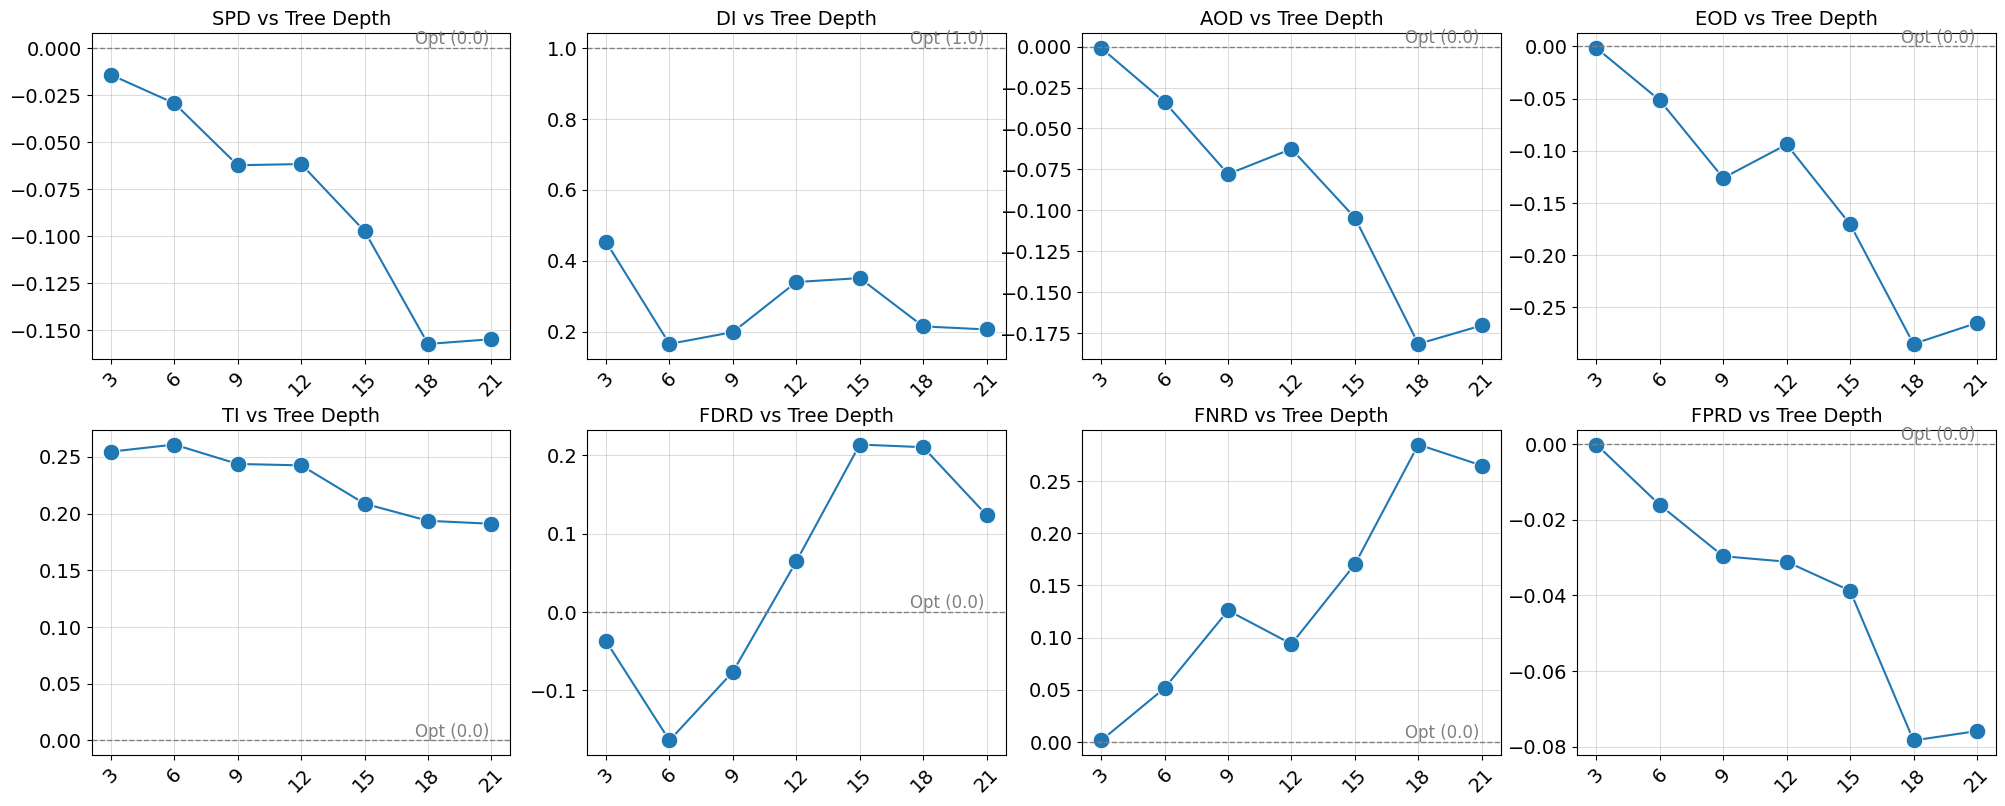

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Abbreviated labels for fairness metrics
metric_labels = {
    'stat_parity_diff': 'SPD',
    'disparate_impact': 'DI',
    'avg_odds_diff': 'AOD',
    'equal_opp_diff': 'EOD',
    'theil_index': 'TI',
    'false_disc_rate_diff': 'FDRD',
    'false_neg_rate_diff': 'FNRD',
    'false_pos_rate_diff': 'FPRD'
}

all_fairness_metrics = [
    'stat_parity_diff', 'disparate_impact', 'avg_odds_diff',
    'equal_opp_diff', 'theil_index', 'false_disc_rate_diff',
    'false_neg_rate_diff', 'false_pos_rate_diff'
]

optimum_values = {
    'stat_parity_diff': 0.0, 'disparate_impact': 1.0,
    'avg_odds_diff': 0.0, 'equal_opp_diff': 0.0,
    'theil_index': 0.0, 'false_disc_rate_diff': 0.0,
    'false_neg_rate_diff': 0.0, 'false_pos_rate_diff': 0.0
}

# Filter for adult dataset only
dataset = 'adult'
dataset_data = data[data['entry_name'] == dataset]

num_metrics = len(all_fairness_metrics)
cols = 4
rows = (num_metrics + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), constrained_layout=True)
axes = axes.flatten()

markers = ["o", "s", "D", "^", "v", "<", ">", "p"]

for i, metric in enumerate(all_fairness_metrics):
    label = metric_labels.get(metric, metric.replace("_", " ").title())

    ax = sns.lineplot(
        data=dataset_data, x='algorithm', y=metric, hue='epsilon',
        style='epsilon', markers=markers, markersize=12,
        ax=axes[i], dashes=False,
    )
    ax.set_title(f'{label} vs Tree Depth', fontsize=14)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel('', fontsize=13)

    if metric in optimum_values:
        ax.axhline(y=optimum_values[metric], color='gray', linestyle='--', linewidth=1)
        ax.text(
            0.95, optimum_values[metric], f"Opt ({optimum_values[metric]:.1f})",
            color="gray", fontsize=12, ha="right", va="bottom", transform=ax.get_yaxis_transform()
        )

    ax.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.4)
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)
    ax.legend_.remove()

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# # Place a single legend neatly
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.01, 0.98), fontsize=12, title='Epsilon', title_fontsize=13)

plt.tight_layout(pad=0.5)
plt.show()